# Monte Carlo Simulation for FE
## IEOR 4703

### Metropolis Hastings (Bivariate Normal)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy import stats

In [2]:
mu1 = 0.
mu2 = 0.
mu = np.array([mu1, mu2])

sig1 = 1.
sig2 = 1.

rho = 0.1

sig_diag = np.diag(np.array([sig1, sig2]))
rho_mat = np.array([[1., rho], [rho, 1.]])
Sigma = np.dot(sig_diag, np.dot(rho_mat, sig_diag))

# initial value
# be mindful of the initial starting point
x0 = np.array([5, -5])

# number of iterations
num_iters = 20000

x_vec = np.zeros((num_iters + 1, 2))
x_vec[0] = x0

# keep track of acceptance and rejection
indicators = np.zeros(num_iters + 1, dtype=int)
indicators[0] = 1

# noise for proposal
sig = 0.04

for i in range(num_iters):
    x_p = x_vec[i] + sig*np.random.randn(2)
    # Metropolis Ratio
    q = np.minimum(1., multivariate_normal.pdf(x_p, mu, Sigma)/multivariate_normal.pdf(x_vec[i], mu, Sigma))
    if np.random.rand() < q:
        # accept
        x_vec[i + 1] = x_p
        indicators[i + 1] = 1
    else:
        # reject
        x_vec[i + 1] = x_vec[i]

x1Array = x_vec[:, 0]
x2Array = x_vec[:, 1]

np.mean(indicators)

np.float64(0.9707014649267537)

### Traceplots

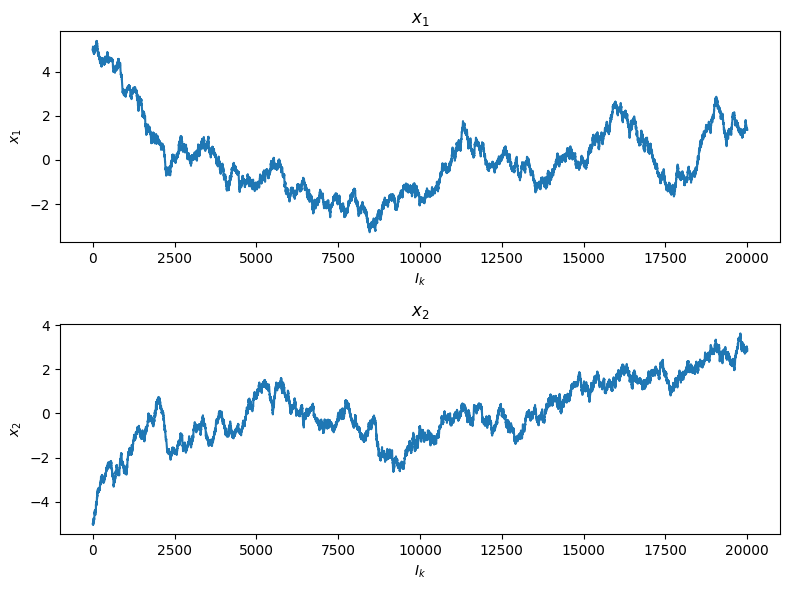

In [3]:
plt.figure(figsize=(8,6))
plt.subplot(2, 1, 1)
plt.plot(x1Array)
plt.xlabel('$I_k$')
plt.ylabel('$x_1$')
plt.title('$x_1$')
plt.tight_layout()

plt.subplot(2, 1, 2)
plt.plot(x2Array)
plt.xlabel('$I_k$')
plt.ylabel('$x_2$')
plt.title('$x_2$')
plt.tight_layout()

plt.show()

### Running Average

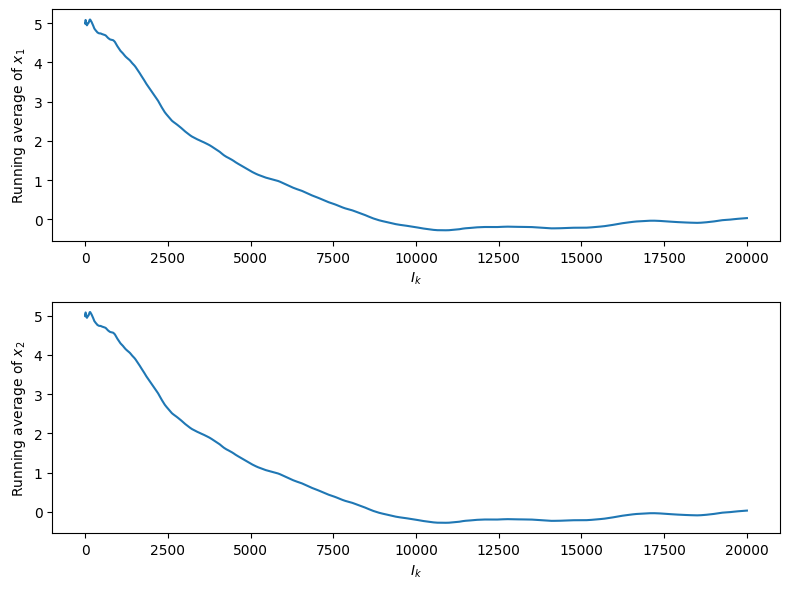

In [4]:
x1RunningAvg = np.cumsum(x1Array) / np.arange(1, num_iters + 2)
x2RunningAvg = np.cumsum(x1Array) / np.arange(1, num_iters + 2)

plt.figure(figsize=(8,6))

plt.subplot(2,1,1)
plt.plot(x1RunningAvg)
plt.xlabel('$I_k$')
plt.ylabel('Running average of $x_1$')
plt.tight_layout()

plt.subplot(2,1,2)
plt.plot(x2RunningAvg)
plt.xlabel('$I_k$')
plt.ylabel('Running average of $x_2$')
plt.tight_layout()

plt.show()

### Assessment by eye-balling

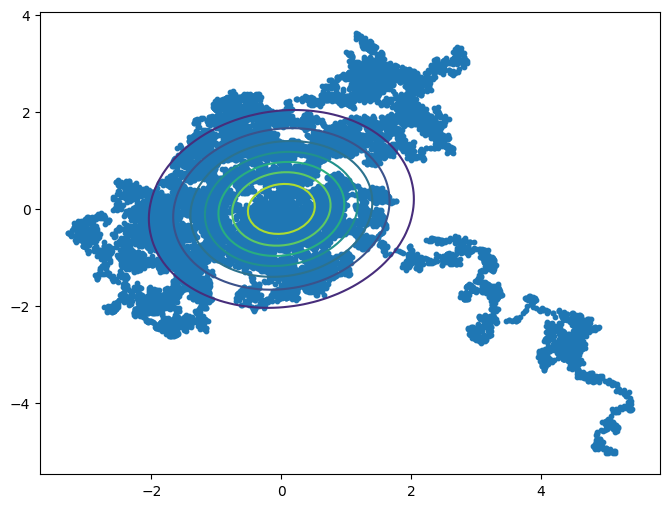

In [5]:
plt.figure(figsize = (8, 6))
x, y = np.meshgrid(np.linspace(-3, 3, 80), np.linspace(-3, 3, 80))
pos = np.dstack((x, y))
rv = multivariate_normal(np.array([mu1, mu2]), Sigma)
plt.contour(x, y, rv.pdf(pos))
plt.scatter(x1Array, x2Array, s=10)
plt.show()